In [8]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

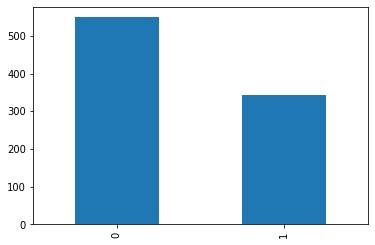

In [2]:
df = pd.read_csv("data/train.csv")
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Survived"].value_counts().plot.bar()
df["Fare"].fillna(df["Fare"].mean(), inplace=True)
# mapping features to numerical values
d1 = {"female": 0, "male": 1}
d2 = {"S": 0, "C": 1, "Q": 2}

# data resampling ?
df["Sex"] = df["Sex"].map(d1)
df["Embarked"] = df["Embarked"].map(d2)

extracted = df.drop(columns="PassengerId", axis=1).drop(columns="Name", axis=1).drop(columns="Cabin", axis=1).drop(columns="Ticket")
# find a way to deal with missing values: cut them off or take average value from its neighbors
extracted = extracted.dropna()
X = extracted.drop(columns="Survived", axis=1)

Y = extracted["Survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# rescale data in trainnig stage (decrease sensitivity of the model)
sc = StandardScaler()
scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)


In [3]:
model = LogisticRegression()
model.fit(trainX_scaled,Y_train)

LogisticRegression()

c:\Users\brian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\brian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


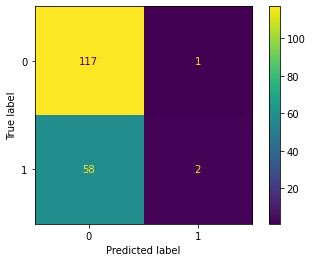

In [4]:
Y_pred = model.predict(testX_scaled)


figure = plot_confusion_matrix(model, X_test, Y_test, display_labels=model.classes_)
plt.show()


In [5]:
print(classification_report(Y_pred,Y_test))
print("Accuracy: {:.2f}".format(accuracy_score(Y_test, Y_pred)))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       122
           1       0.65      0.70      0.67        56

    accuracy                           0.79       178
   macro avg       0.75      0.76      0.76       178
weighted avg       0.79      0.79      0.79       178

Accuracy: 0.79


c:\Users\brian\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: Input could not be cast to an at-least-1D NumPy array

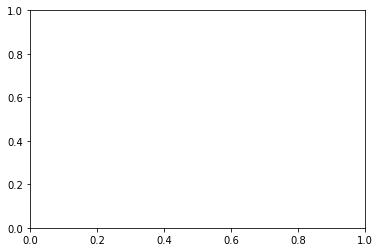

In [12]:
sklearn.plot_learning_curve()